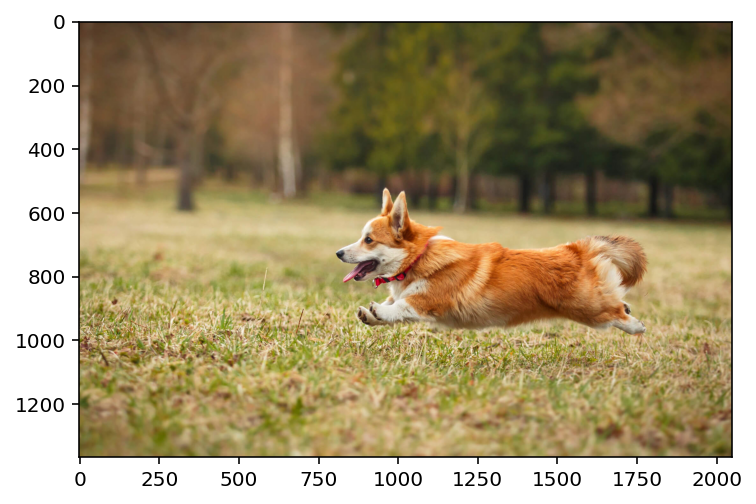

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

img = plt.imread('dog.jpg')
plt.imshow(img)

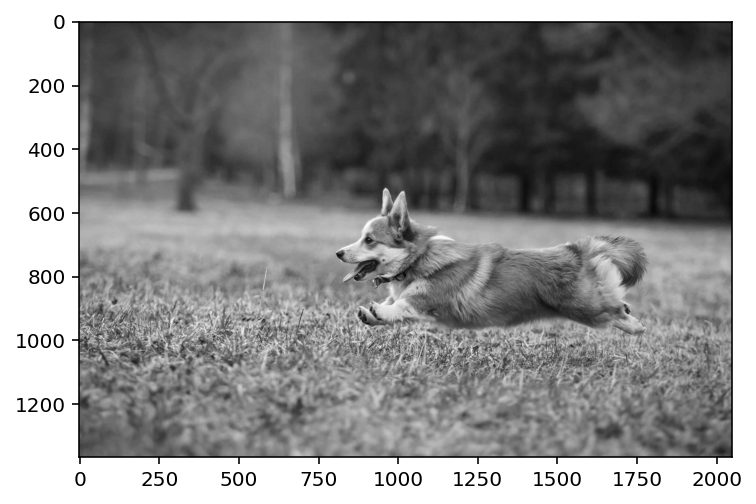

In [3]:
# Convert to grayscale
img = img.mean(axis=2)
plt.imshow(img, cmap='gray')

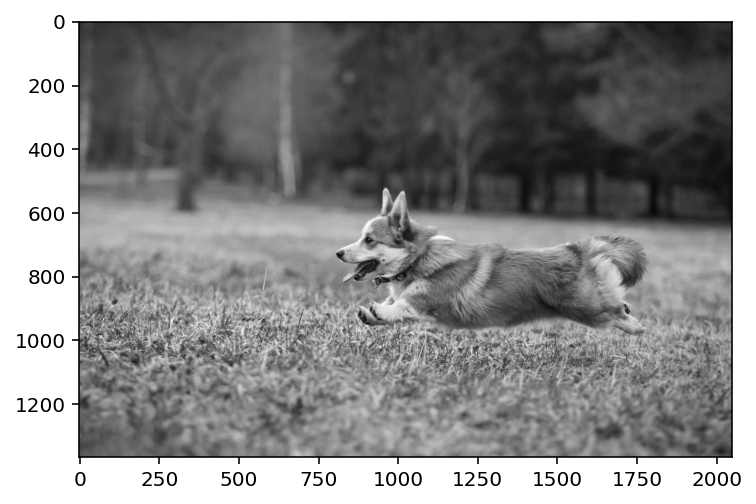

In [4]:
img = img/255
plt.imshow(img, cmap='gray')

In [59]:
# MF code with missing values
import torch
import torch.nn as nn
import torch.nn.functional as F

# INIT WELL!

def factorize(A, k, niter=100, lr=1e-3):
    n, m = A.shape
    # If we do not init well, our solution is poor
    W = torch.abs(torch.randn(n, k)/10).to(A.device)
    H = torch.abs(torch.randn(k, m)/10).to(A.device)
    #W = torch.randn(n, k).to(A.device)
    #H = torch.randn(k, m).to(A.device)
    W.requires_grad = True
    H.requires_grad = True

    # Mask where A is not missing
    mask = ~torch.isnan(A).to(A.device)
    print(mask.shape)

    optimizer = torch.optim.Adam([W, H], lr=lr)
    for i in range(niter):
        optimizer.zero_grad()
        Ahat = W @ H
        loss = F.mse_loss(Ahat[mask], A[mask])
        loss.backward()
        optimizer.step()
        if i % 50 == 0:
            print(i, loss.item())
    return W, H


In [60]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [61]:
A = torch.from_numpy(img).float().to(device)
W, H = factorize(A, 40, niter=500, lr=1e-2)

torch.Size([1365, 2048])
0 0.06817418336868286
50 0.009624256752431393
100 0.004642861895263195
150 0.0027925868052989244
200 0.0018268945859745145
250 0.001446255948394537
300 0.001321688061580062
350 0.0012761197285726666
400 0.0012540414463728666
450 0.0012417419347912073


In [62]:
W@H

tensor([[0.2184, 0.2236, 0.2266,  ..., 0.2066, 0.2106, 0.2134],
        [0.2185, 0.2236, 0.2265,  ..., 0.2064, 0.2104, 0.2131],
        [0.2187, 0.2238, 0.2267,  ..., 0.2056, 0.2094, 0.2121],
        ...,
        [0.3433, 0.3438, 0.3415,  ..., 0.3319, 0.3323, 0.3321],
        [0.3411, 0.3423, 0.3405,  ..., 0.3397, 0.3399, 0.3396],
        [0.3397, 0.3416, 0.3401,  ..., 0.3455, 0.3457, 0.3453]],
       device='cuda:0', grad_fn=<MmBackward0>)

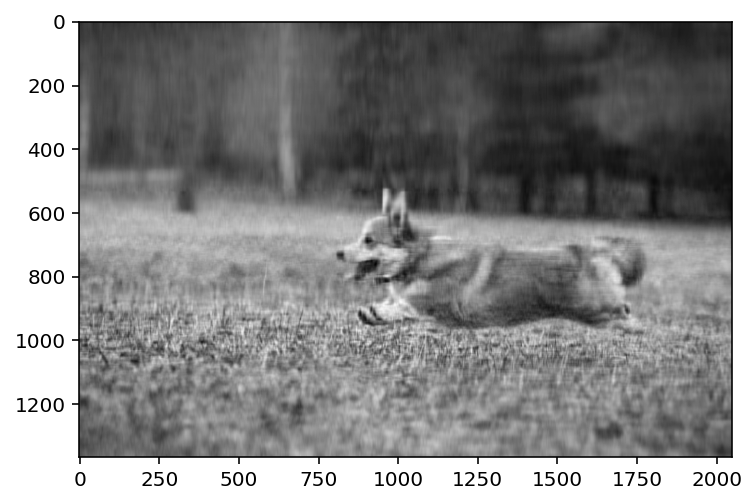

In [63]:
# Plot reconstructed image
plt.imshow((W @ H).cpu().detach().numpy(), cmap='gray')

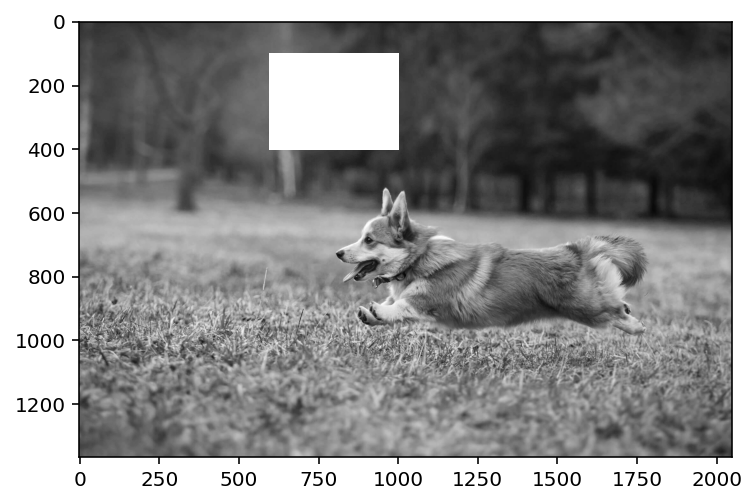

In [10]:
# Now, remove a rectangular patch from the image

patch = [100, 600, 400, 1000]
img_copy = img.copy()

# NAN the patch region
img_copy[patch[0]:patch[2], patch[1]: patch[3]] = np.NaN
plt.imshow(img_copy,cmap='gray')

In [11]:
A = torch.from_numpy(img_copy).float().to(device)
W, H = factorize(A, 40, niter=500, lr=1e-2)

torch.Size([1365, 2048])
0 0.07008275389671326
50 0.010157980024814606
100 0.004786033183336258
150 0.0028808838687837124
200 0.0018825450679287314
250 0.0014831097796559334
300 0.00133986072614789
350 0.00129795225802809
400 0.0012805043952539563
450 0.0012705608969554305


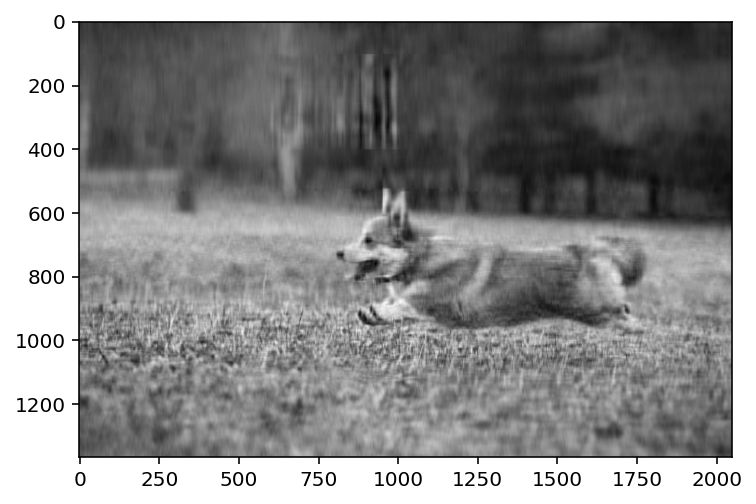

In [12]:
plt.imshow((W@H).cpu().detach().numpy(), cmap='gray')

In [13]:
A = torch.from_numpy(img_copy).float().to(device)
W, H = factorize(A, 2000, niter=10000, lr=1e-2)

torch.Size([1365, 2048])
0 151.32118225097656
50 0.053587257862091064
100 0.0328286774456501
150 0.028992202132940292
200 0.025189215317368507
250 0.021402839571237564
300 0.017760802060365677
350 0.014506581239402294
400 0.011836829595267773
450 0.009722495451569557
500 0.008035768754780293
550 0.006668942980468273
600 0.005548533983528614
650 0.004626259207725525
700 0.0038673582021147013
750 0.003243650309741497
800 0.0027311642188578844
850 0.002309612464159727
900 0.001962121110409498
950 0.001674843137152493
1000 0.0014365077950060368
1050 0.001237988006323576
1100 0.0010719174752011895
1150 0.0009323609410785139
1200 0.0008145408355630934
1250 0.0007146071875467896
1300 0.0006294533377513289
1350 0.0005565652973018587
1400 0.0004939022473990917
1450 0.00043980134068988264
1500 0.0003929023223463446
1550 0.0003520874015521258
1600 0.0003164346853736788
1650 0.00028518016915768385
1700 0.0002576881379354745
1750 0.00023342730128206313
1800 0.00021195180306676775
1850 0.00019288611

KeyboardInterrupt: 

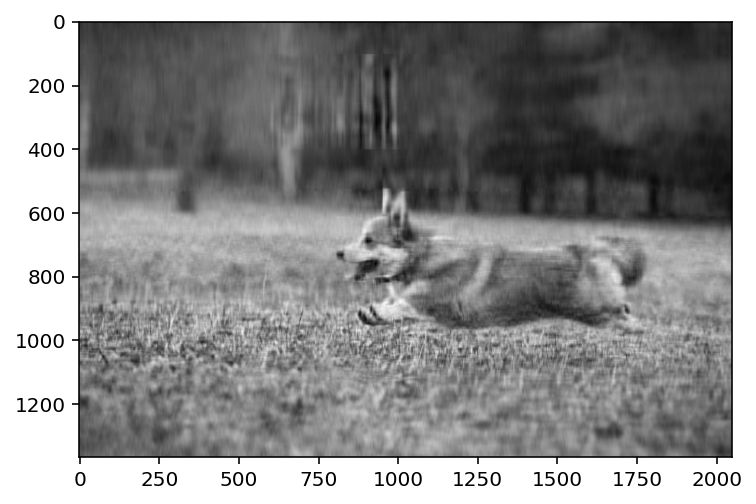

In [14]:
plt.imshow((W@H).cpu().detach().numpy(), cmap='gray')

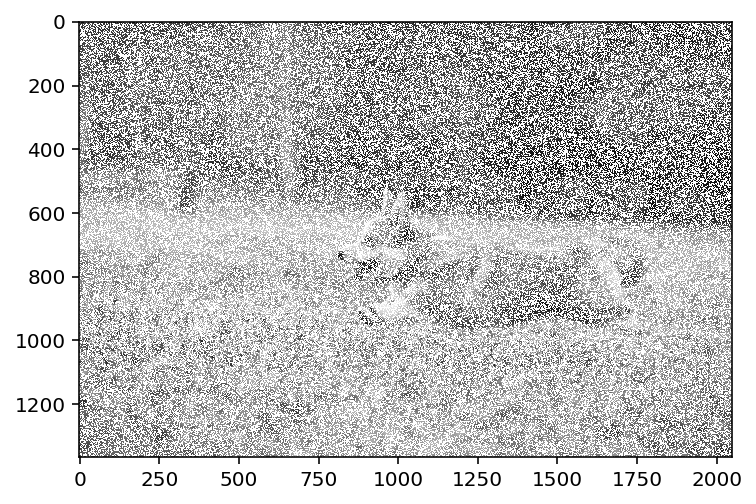

In [15]:
import numpy.ma as ma

img_copy_mar = img.copy()
# Mask 50% of the values
mask = np.random.rand(*img_copy_mar.shape) < 0.5
img_copy_mar[mask] = np.NaN

plt.imshow(img_copy_mar, cmap='gray', interpolation='none')


In [16]:
A = torch.from_numpy(img_copy_mar).float().to(device)
W, H = factorize(A, 40, niter=500, lr=1e-2)

torch.Size([1365, 2048])
0 0.06847646087408066
50 0.009698617272078991
100 0.004532135557383299
150 0.0027155799325555563
200 0.0017738448223099113
250 0.0013879495672881603
300 0.0012326812138780951
350 0.001177298603579402
400 0.0011539665283635259
450 0.0011406586272642016


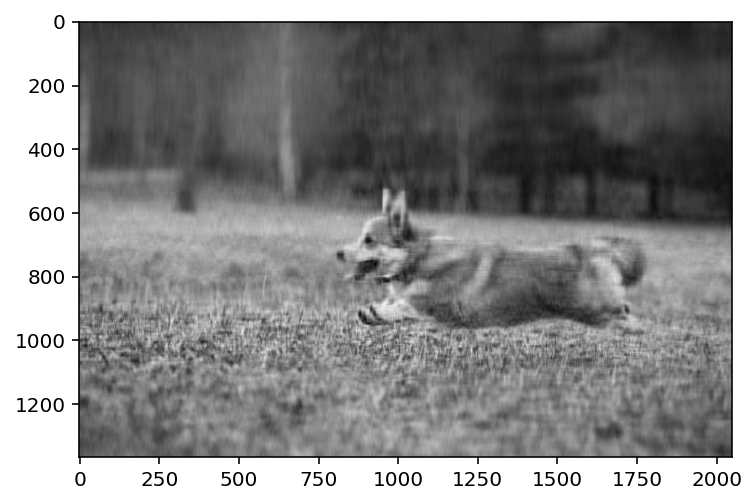

In [17]:
plt.imshow((W@H).cpu().detach().numpy(), cmap='gray')

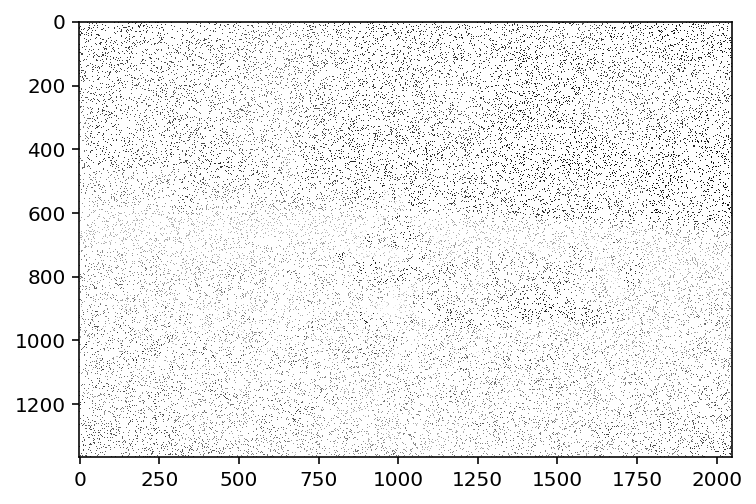

In [34]:
img_copy_mar = img.copy()
# Mask 95% of the values
mask = np.random.rand(*img_copy_mar.shape) < 0.90
img_copy_mar[mask] = np.NaN

plt.imshow(img_copy_mar, cmap='gray', interpolation='none')


In [37]:
A = torch.from_numpy(img_copy_mar).float().to(device)
W, H = factorize(A, 6, niter=5000, lr=1e-2)


torch.Size([1365, 2048])
0 0.19373248517513275
50 0.011713889427483082
100 0.011015579104423523
150 0.010831421241164207
200 0.00988197885453701
250 0.0070482841692864895
300 0.005951507017016411
350 0.005491257179528475
400 0.005056201014667749
450 0.004716753028333187
500 0.004533899482339621
550 0.004458062816411257
600 0.004424984101206064
650 0.004407119005918503
700 0.0043948739767074585
750 0.004384889733046293
800 0.004376130178570747
850 0.004368423484265804
900 0.004361842758953571
950 0.004356436897069216
1000 0.004352156538516283
1050 0.004348871763795614
1100 0.0043464116752147675
1150 0.004344604909420013
1200 0.004343296866863966
1250 0.0043423594906926155
1300 0.004341694060713053
1350 0.0043412246741354465
1400 0.004340897314250469
1450 0.004340670071542263
1500 0.004340513609349728
1550 0.004340406507253647
1600 0.004340334329754114
1650 0.0043402849696576595
1700 0.004340252839028835
1750 0.0043402318842709064
1800 0.004340217448771
1850 0.004340208601206541
1900 0.0

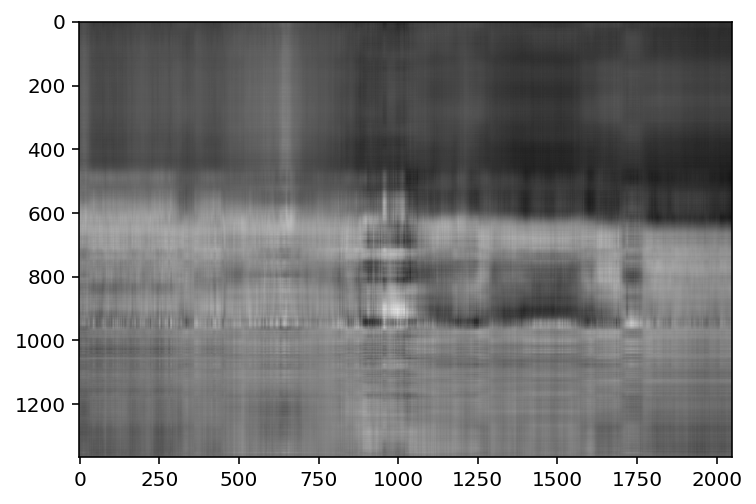

In [38]:
plt.imshow((W@H).cpu().detach().numpy(), cmap='gray')